# Exploratory Analysis on Cooja


We want to compare the results of our previus analysis with an alternative dataset obtained by Cooja. We start our analysis importing relevant informations from each node.

In [93]:
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

dataset = {}

for file in os.listdir("data/cooja/traces"):
    with open('data/cooja/traces/' + file, 'r') as f:
        dataset[file] = json.load(f)

print('Data sets:')
print(list(dataset.keys()))

Data sets:
['test_1BH_2018-11-09_12_31_25.json', 'test_nom_2018-11-09_08_55_11.json', 'test_1BH_2018-11-09_14_37_46.json']


In [94]:
data = dataset['test_nom_2018-11-09_08_55_11.json']
nodes = None

for node in data:
    if nodes is None:
        nodes = pd.DataFrame(data[node]['pkts']).drop(['pkt','ttl'], axis=1)
        nodes.columns = [str(node)]
    else:
        df = pd.DataFrame(data[node]['pkts']).drop(['pkt','ttl'], axis=1)
        df.columns = [str(node)]
        nodes = nodes.join(df)

nodes = pd.DataFrame(nodes) 
nodes.head(10)

,aaaa::212:7404:4:404:,aaaa::212:7403:3:303:,aaaa::212:7402:2:202:,aaaa::212:7406:6:606:,aaaa::212:7409:9:909:,aaaa::212:740a:a:a0a:,aaaa::212:7405:5:505:,aaaa::212:7408:8:808:,aaaa::212:7407:7:707:
0,862.0,1360.0,1047.0,2274.0,2930.0,2770.0,2106.0,3707.0,2252.0
1,1188.0,776.0,904.0,2386.0,5871.0,4021.0,2199.0,4774.0,4817.0
2,1333.0,1175.0,839.0,3041.0,4158.0,2857.0,3245.0,4731.0,3471.0
3,913.0,1290.0,761.0,2311.0,3530.0,3513.0,1865.0,2578.0,1957.0
4,1032.0,892.0,836.0,2374.0,3111.0,2839.0,1737.0,5380.0,1961.0
5,1534.0,1030.0,813.0,3307.0,4150.0,3926.0,3094.0,3267.0,2481.0
6,1409.0,1245.0,1415.0,2926.0,3769.0,3891.0,2878.0,3973.0,2450.0
7,1112.0,1468.0,1218.0,2671.0,5327.0,2699.0,3071.0,3053.0,3001.0
8,1743.0,1223.0,1564.0,2715.0,3566.0,5412.0,1852.0,4316.0,1669.0
9,2830.0,1130.0,1551.0,4920.0,4966.0,3180.0,3272.0,3156.0,2408.0


Each node communicates with the root of the DODAG through a certain number of hops. 

In [112]:
hops = {}
icmp = [x for x in range(1,len(nodes)+1)]

for node in data:
    df = pd.DataFrame(data[node]['pkts']).drop(['pkt','rtt'], axis=1)
    if df.iloc[0][0] in hops:
        hops[df.iloc[0][0]].append(node)
    else:
        hops[df.iloc[0][0]] = [node]

hop_num = 0
for k in hops.keys():
    hop_num += 1
    hops[hop_num] = hops.pop(k)

# Contain mean time for each distance from the root
hop_nodes = pd.DataFrame({1: nodes[hops[1]].mean(axis=1), 2: nodes[hops[2]].mean(axis=1),\
                           3: nodes[hops[3]].mean(axis=1)})
hop_nodes.head(10)

,1,2,3
0,1089.666667,2210.666667,3135.666667
1,956.000000,3134.000000,4888.666667
2,1115.666667,3252.333333,3915.333333
3,988.000000,2044.333333,3207.000000
4,920.000000,2024.000000,3776.666667
5,1125.666667,2960.666667,3781.000000
6,1356.333333,2751.333333,3877.666667
7,1266.000000,2914.333333,3693.000000
8,1510.000000,2078.666667,4431.333333
9,1837.000000,3533.333333,3767.333333


For each node we plot the graph that measures the delay with respect to the number of sequence.

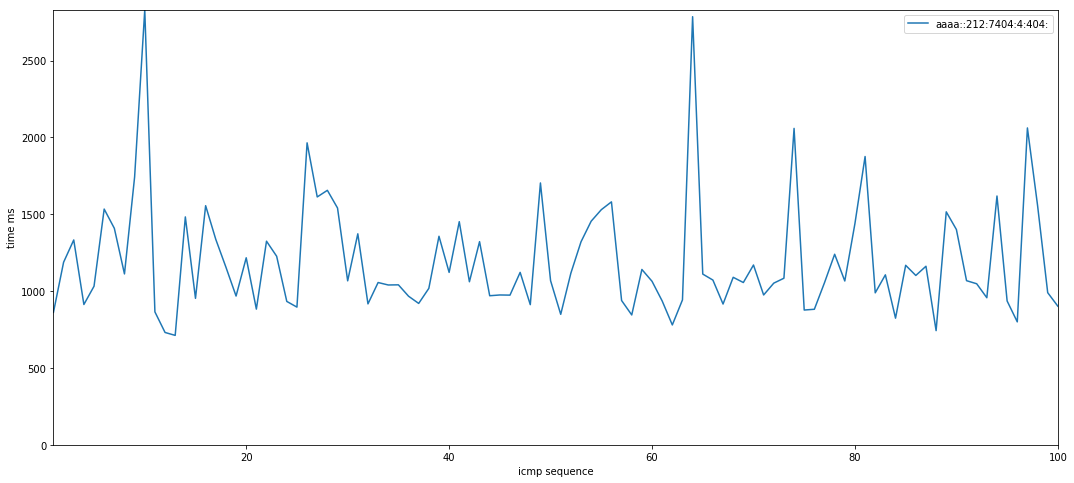

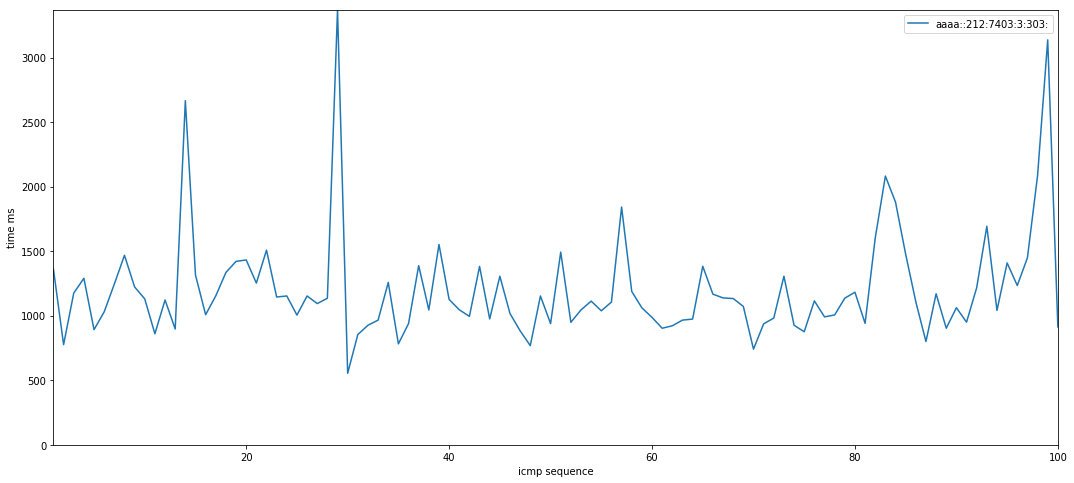

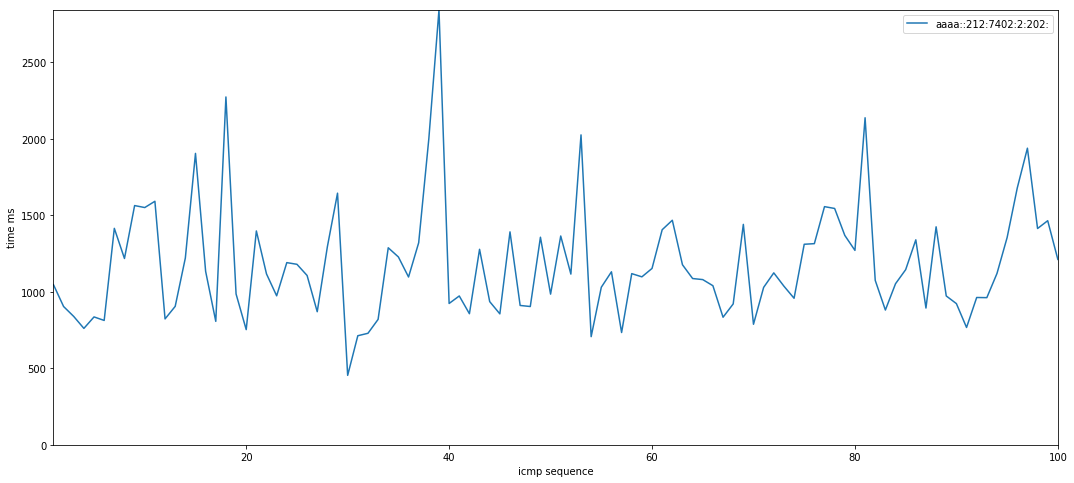

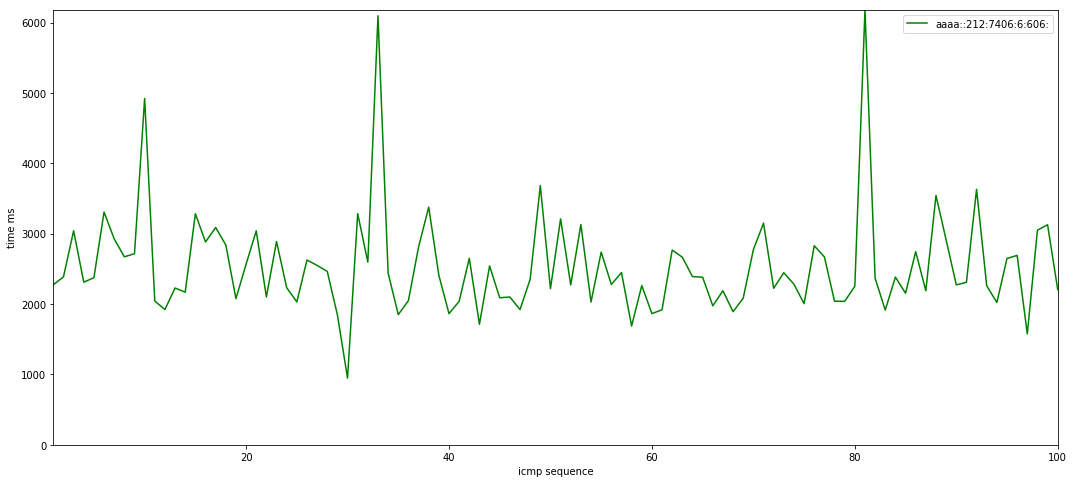

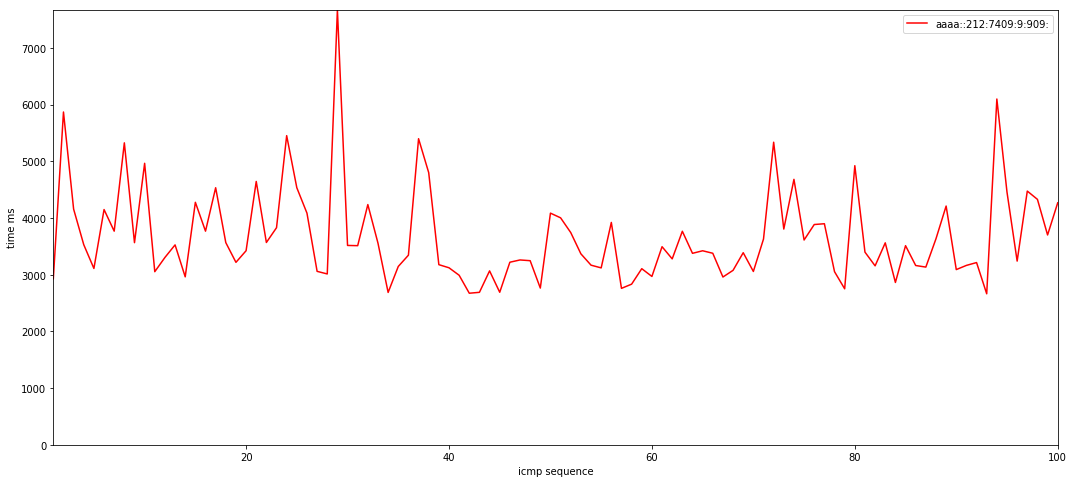

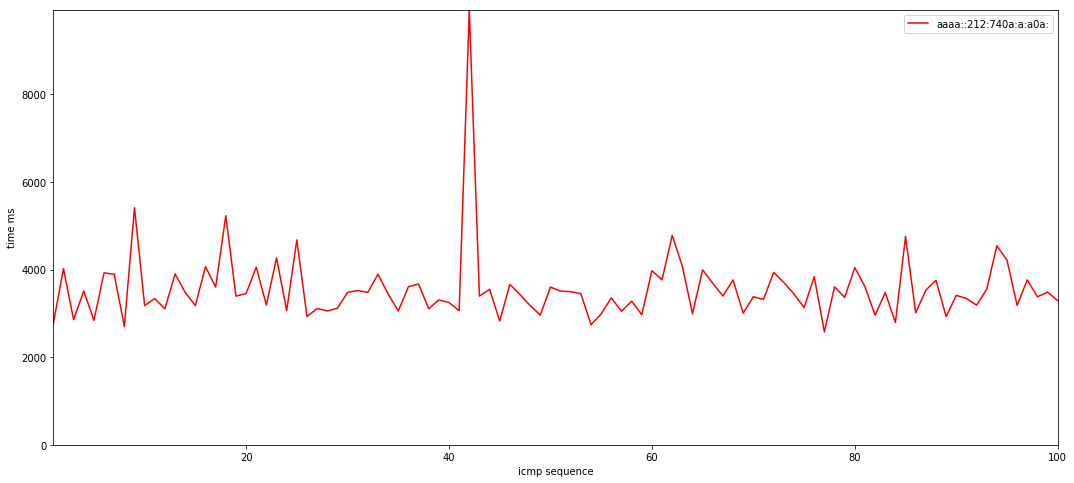

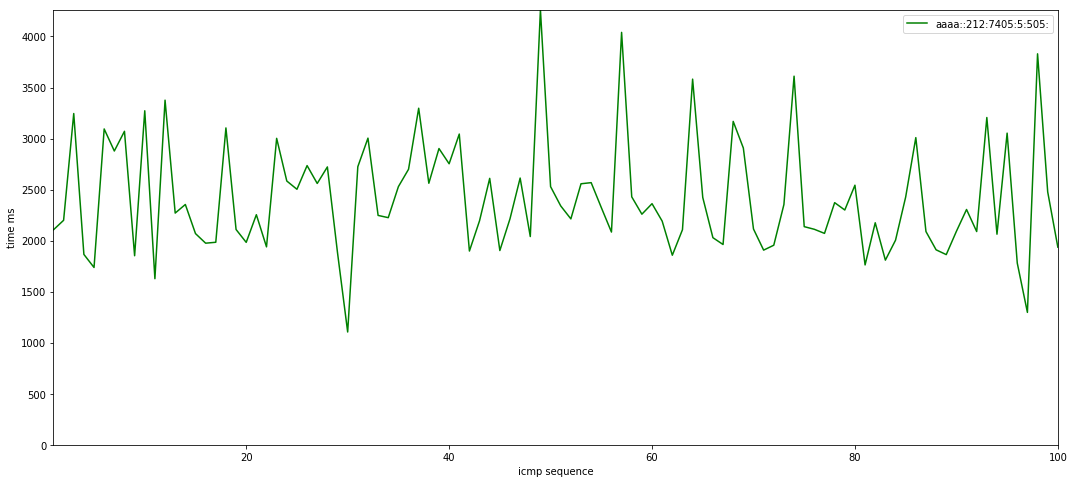

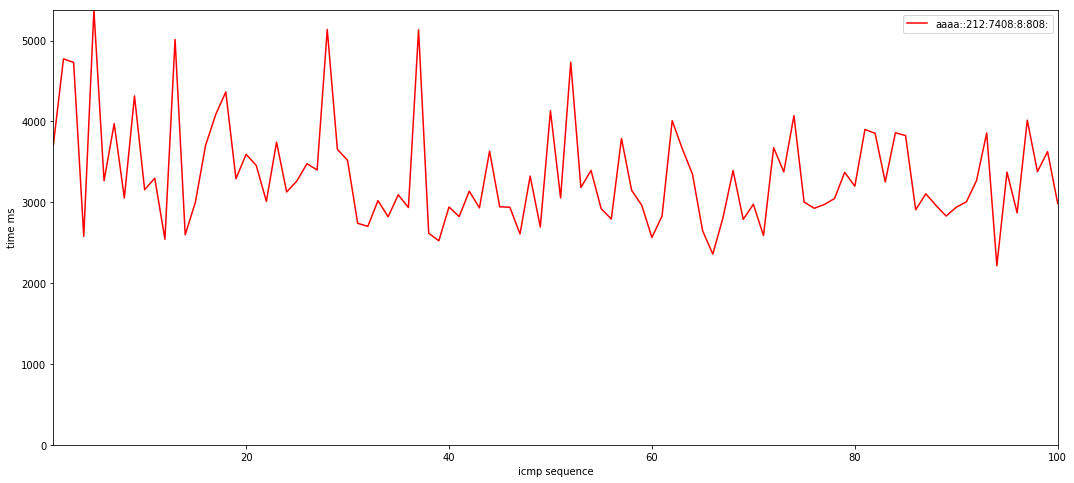

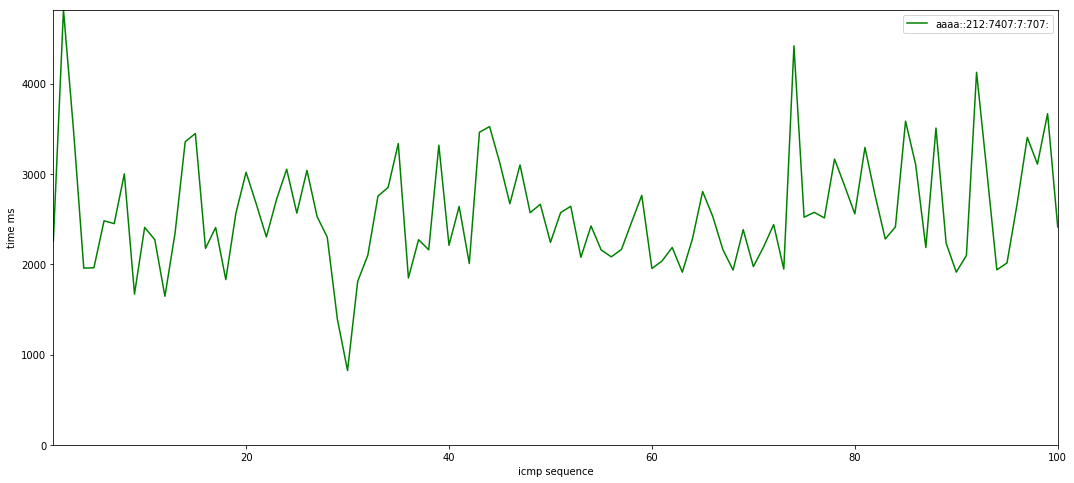

In [113]:
for node in nodes.keys():
    tms = nodes[node]
    
    plt.figure(figsize=(18,8))
    plt.ylabel('time ms')
    plt.xlabel('icmp sequence')
    
    if node in hops[1]:
        plt.plot(icmp, tms, label=node)
    elif node in hops[2]:
        plt.plot(icmp, tms, 'green', label=node)
    else:
        plt.plot(icmp, tms, 'red', label=node)

    plt.axis([1,icmp[-1], 0.0, sorted(tms)[-1]])
    plt.legend()
    plt.show()

Let us see how does the delay change with respect to the distance from the root.

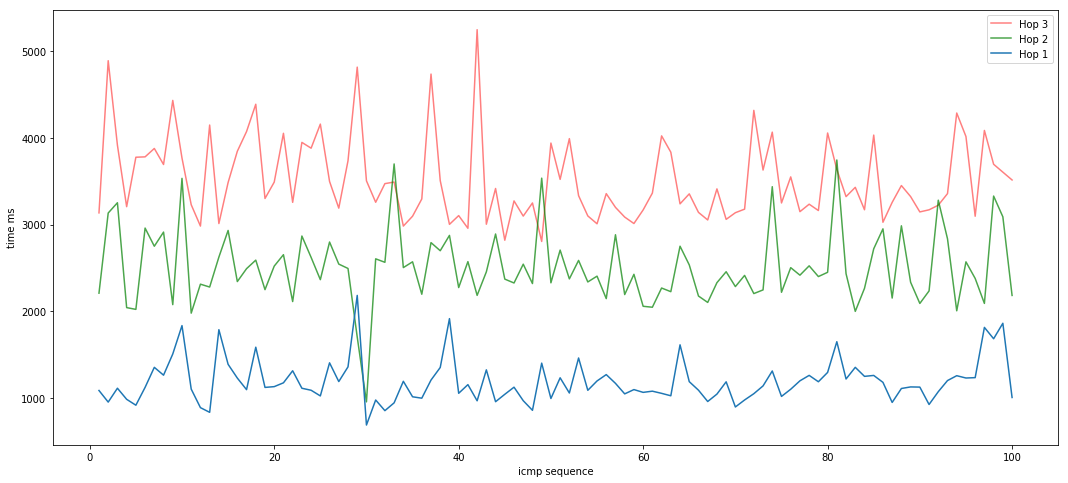

In [114]:
fig, ax = plt.subplots(figsize=(18,8))

line3, = ax.plot(icmp, hop_nodes[3], 'red', alpha=0.5, label='Hop 3')
line2, = ax.plot(icmp, hop_nodes[2], 'green', alpha=0.7, label='Hop 2')
line1, = ax.plot(icmp, hop_nodes[1], label='Hop 1')

plt.ylabel('time ms')
plt.xlabel('icmp sequence')
ax.legend()
plt.show()

It is also useful to read some statistics from the dataset. For each node:

In [115]:
nodes.describe()

,aaaa::212:7404:4:404:,aaaa::212:7403:3:303:,aaaa::212:7402:2:202:,aaaa::212:7406:6:606:,aaaa::212:7409:9:909:,aaaa::212:740a:a:a0a:,aaaa::212:7405:5:505:,aaaa::212:7408:8:808:,aaaa::212:7407:7:707:
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,1196.700000,1202.970000,1179.520000,2538.790000,3672.330000,3554.660000,2417.55000,3335.400000,2560.500000
std,375.163412,426.167309,374.558851,748.419105,842.307438,825.962631,562.32302,643.759695,626.548208
min,712.000000,554.000000,454.000000,948.000000,2664.000000,2576.000000,1105.00000,2215.000000,823.000000
25%,950.500000,966.000000,918.500000,2087.500000,3118.500000,3114.750000,2037.25000,2929.750000,2160.750000
50%,1070.000000,1118.500000,1116.500000,2377.500000,3459.500000,3442.000000,2285.00000,3169.500000,2458.500000
75%,1361.000000,1306.000000,1359.000000,2781.500000,4024.750000,3757.250000,2722.50000,3664.750000,2900.500000
max,2830.000000,3369.000000,2843.000000,6179.000000,7672.000000,9927.000000,4260.00000,5380.000000,4817.000000


For each hop:

In [116]:
hop_nodes.describe()

,1,2,3
count,100.000000,100.000000,100.000000
mean,1193.063333,2505.613333,3520.796667
std,253.755853,427.847049,482.733249
min,691.666667,958.666667,2806.333333
25%,1041.416667,2234.500000,3167.916667
50%,1129.666667,2431.333333,3360.666667
75%,1264.250000,2710.750000,3837.333333
max,2185.000000,3745.000000,5246.000000


Now we use a Kernel density estimation (a way to estimate the probability density function of a random variable in a non-parametric way). It is useful to plot also a histogram in order to study the distribution of data.

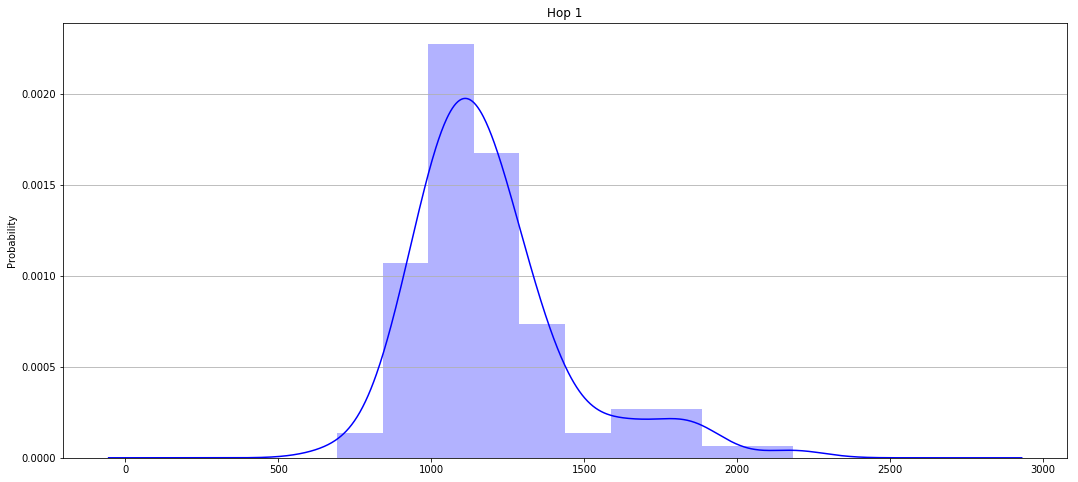

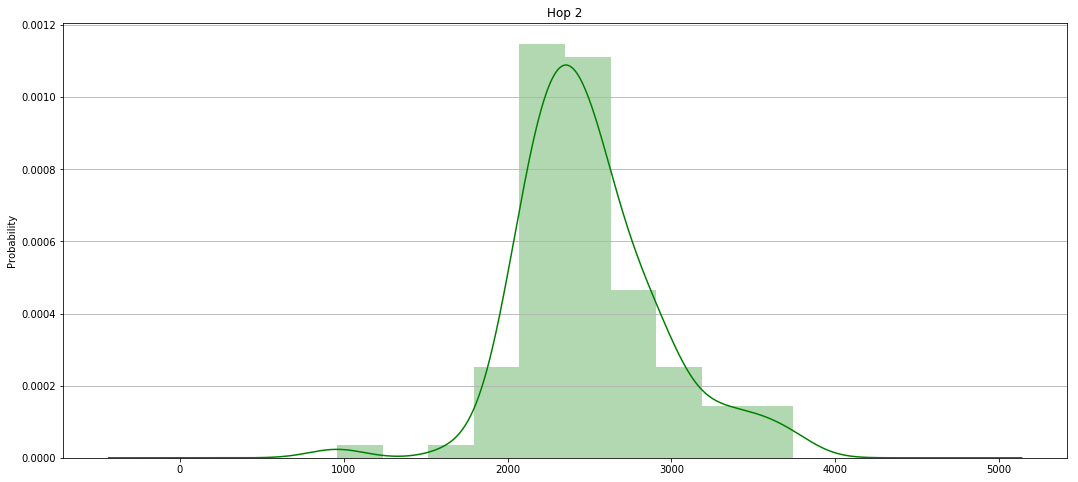

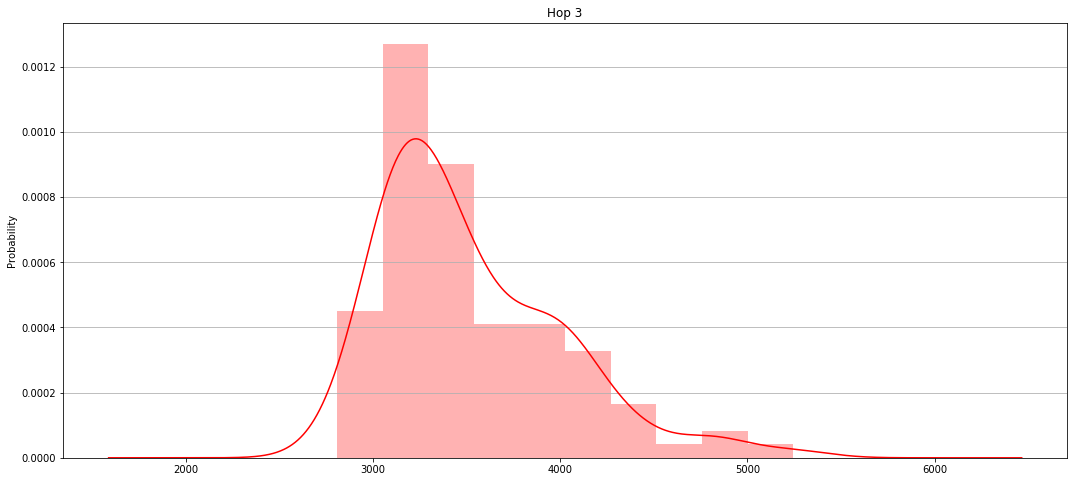

In [117]:
for hop in hop_nodes:
    fig, ax = plt.subplots(figsize=(18,8))
    if hop == 1:
        hop_nodes[hop].plot.kde(ax=ax,color='blue', title='Hop ' + str(hop))
        hop_nodes[hop].plot.hist(density=True,color='blue',alpha=0.3, ax=ax)
    elif hop == 2:
        hop_nodes[hop].plot.kde(ax=ax,color='green', title='Hop ' + str(hop))
        hop_nodes[hop].plot.hist(density=True,color='green',alpha=0.3, ax=ax)
    else:
        hop_nodes[hop].plot.kde(ax=ax,color='red', title='Hop ' + str(hop))
        hop_nodes[hop].plot.hist(density=True,color='red',alpha=0.3, ax=ax)
    ax.set_ylabel('Probability')
    ax.grid(axis='y')

As you can see, it seems that nodes communicating directly with the root have lower probability of timeouts, while the stability of messages degrades as we move away. Thus, the probability of having a timeout seems to increase as the distance from root increases. Let's check.

In [118]:
pd.DataFrame([[h, str(hop_nodes[h].loc[hop_nodes[h] < 0].count()/hop_nodes[h].count()*100)+'%'] for h in hops], \
             columns=['Hop','Probability of error'])

,Hop,Probability of error
0,1,0.0%
1,2,0.0%
2,3,0.0%


It is also interesting to see how the time to complete 2000 pings varies as the distance from the root increases.

In [119]:
time_nodes = {}
for h in hops:
    for time in hop_nodes[h].keys():
        if h not in time_nodes:
            if hop_nodes[h][time] < 0:
                time_nodes[h] = [0.0]
            else:
                time_nodes[h] = [hop_nodes[h][time]]
        else:
            if hop_nodes[h][time] < 0:
                time_nodes[h].append(time_nodes[h][-1])
            else:
                time_nodes[h].append(time_nodes[h][-1] + hop_nodes[h][time])

time_nodes = pd.DataFrame(time_nodes) 
time_nodes.tail(1)

,1,2,3
99,119306.333333,250561.333333,352079.666667


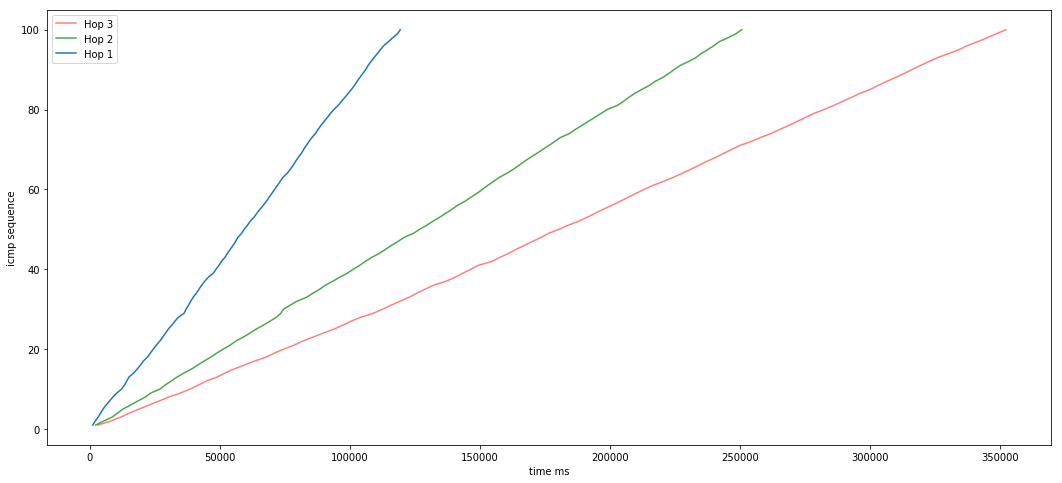

In [120]:
fig, ax = plt.subplots(figsize=(18,8))

line3, = ax.plot(time_nodes[3], icmp, 'red', alpha=0.5, label='Hop 3')
line2, = ax.plot(time_nodes[2], icmp, 'green', alpha=0.7, label='Hop 2')
line1, = ax.plot(time_nodes[1], icmp, label='Hop 1')

plt.ylabel('icmp sequence')
plt.xlabel('time ms')
ax.legend()
plt.show()